## 웹 크롤링 방법  
- 동적페이지 : URL의 변경 없이 페이지의 내용이 변경 -> json
- 정적페이지 : URL이 변경되면서 페이지의 내용이 변경 -> html


In [1]:
import pandas as pd
import requests

<font size = "5px"> <b>네이버 주가 데이터 수집</b></font>
- 동적페이지 : JSON
- PC페이지가 복잡하면 <b>모바일 페이지</b>에서 수집하면 좋다.

### 웹 서비스 분석 : 개발자 도구 : URL

In [17]:
page_size, page = 20, 1
url = f"https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}"
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=20&page=1'

### 서버에 데이터 요청 : request(URL) -> response(JSON(str)

In [12]:
response = requests.get(url)
response

<Response [200]>

In [13]:
# 데이터 출력
response.text[:200]

'[{"localTradedAt":"2022-02-21","closePrice":"2,728.02","compareToPreviousClosePrice":"-16.50","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.60","openPrice"'

### JSON(str) -> parsing(데이터의 형태를 바꾼다) -> dict, list -> DataFrame

In [14]:
datas = response.json()
type(datas)

list

In [15]:
datas[:2]

[{'localTradedAt': '2022-02-21',
  'closePrice': '2,728.02',
  'compareToPreviousClosePrice': '-16.50',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.60',
  'openPrice': '2,706.65',
  'highPrice': '2,734.53',
  'lowPrice': '2,694.90'},
 {'localTradedAt': '2022-02-18',
  'closePrice': '2,744.52',
  'compareToPreviousClosePrice': '0.43',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.02',
  'openPrice': '2,714.52',
  'highPrice': '2,747.08',
  'lowPrice': '2,711.88'}]

In [16]:
columns = ["localTradedAt", "closePrice"]
kospi_df = pd.DataFrame(datas)[columns]
kospi_df.head()

,localTradedAt,closePrice
0,2022-02-21,"2,728.02"
1,2022-02-18,"2,744.52"
2,2022-02-17,"2,744.09"
3,2022-02-16,"2,729.68"
4,2022-02-15,"2,676.54"


### 함수로 만들기

In [26]:
def stock_price(code = "KOSPI", page_size = 20, page = 1):
    """
    params : code(KOSPI or KOSDAQ)
    """
    
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[["localTradedAt", "closePrice"]]

In [27]:
df = stock_price("KOSDAQ")
df.head(2)

,localTradedAt,closePrice
0,2022-02-21,881.81
1,2022-02-18,881.71


### 실습 : 원 달러 환율 데이터 수집

In [28]:
page_size = 20
page = 1
url = f"https://api.stock.naver.com/marketindex/exchange/FX_USDKRW/prices?page={page}&pageSize={page_size}"


In [31]:
response = requests.get(url)
datas = response.json()
datas

[{'localTradedAt': '2022-02-21',
  'closePrice': '1,195.00',
  'fluctuations': '-0.50',
  'fluctuationsRatio': '-0.04',
  'fluctuationsType': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'cashBuyValue': '1,215.91',
  'cashSellValue': '1,174.09',
  'sendValue': '1,206.70',
  'receiveValue': '1,183.30'},
 {'localTradedAt': '2022-02-18',
  'closePrice': '1,195.50',
  'fluctuations': '-2.00',
  'fluctuationsRatio': '-0.17',
  'fluctuationsType': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'cashBuyValue': '1,216.42',
  'cashSellValue': '1,174.58',
  'sendValue': '1,207.20',
  'receiveValue': '1,183.80'},
 {'localTradedAt': '2022-02-17',
  'closePrice': '1,197.50',
  'fluctuations': '-0.50',
  'fluctuationsRatio': '-0.04',
  'fluctuationsType': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'cashBuyValue': '1,218.45',
  'cashSellValue': '1,176.55',
  'sendValue': '1,209.20',
  'receiveValue': '1,185.80'},
 {'localTradedAt': '2022-02-16',
  'closePrice': '1,198.00',
  'fluctuati

In [35]:
def exchange_rate(code = "FX_USDKRW", page_size = 20, page = 1):
    url = f"https://api.stock.naver.com/marketindex/exchange/{code}/prices?page={page}&pageSize={page_size}"
    datas = requests.get(url).json()
    
    return pd.DataFrame(datas)[["localTradedAt", "closePrice"]]
usd = exchange_rate()
usd.head()

,localTradedAt,closePrice
0,2022-02-21,"1,194.60"
1,2022-02-18,"1,195.50"
2,2022-02-17,"1,197.50"
3,2022-02-16,"1,198.00"
4,2022-02-15,"1,197.50"


## 시각화 및 상관관계 분석

In [33]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 수집 : kospi, kosdaq, usd

In [44]:
kospi = stock_price()
kosdaq = stock_price("KOSDAQ")
usd = exchange_rate()

### 데이터 전처리 : str -> float

In [45]:
kospi.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [46]:
kospi["closePrice"] = kospi["closePrice"].apply(lambda data: float(data.replace(",", "")))
kosdaq["closePrice"] = kosdaq["closePrice"].apply(lambda data: float(data.replace(",", "")))
usd["closePrice"] = usd["closePrice"].apply(lambda data: float(data.replace(",", "")))

In [47]:
print(kospi.dtypes)
print(kosdaq.dtypes)
print(usd.dtypes)

localTradedAt     object
closePrice       float64
dtype: object
localTradedAt     object
closePrice       float64
dtype: object
localTradedAt     object
closePrice       float64
dtype: object


In [51]:
df = kospi.copy()
df = df.rename(columns = {"localTradedAt" : "date", "closePrice" : "kospi"})
df["Kosdaq"] = kosdaq["closePrice"]
df["usd"] = usd["closePrice"]
df

,date,kospi,Kosdaq,usd
0,2022-02-21,2737.97,881.66,1194.2
1,2022-02-18,2744.52,881.71,1195.5
2,2022-02-17,2744.09,874.22,1197.5
3,2022-02-16,2729.68,878.15,1198.0
4,2022-02-15,2676.54,839.92,1197.5
5,2022-02-14,2704.48,852.79,1197.5
6,2022-02-11,2747.71,877.42,1199.5
7,2022-02-10,2771.93,895.68,1196.5
8,2022-02-09,2768.85,910.53,1196.0
9,2022-02-08,2746.47,895.27,1198.5


### 그래프 그리기

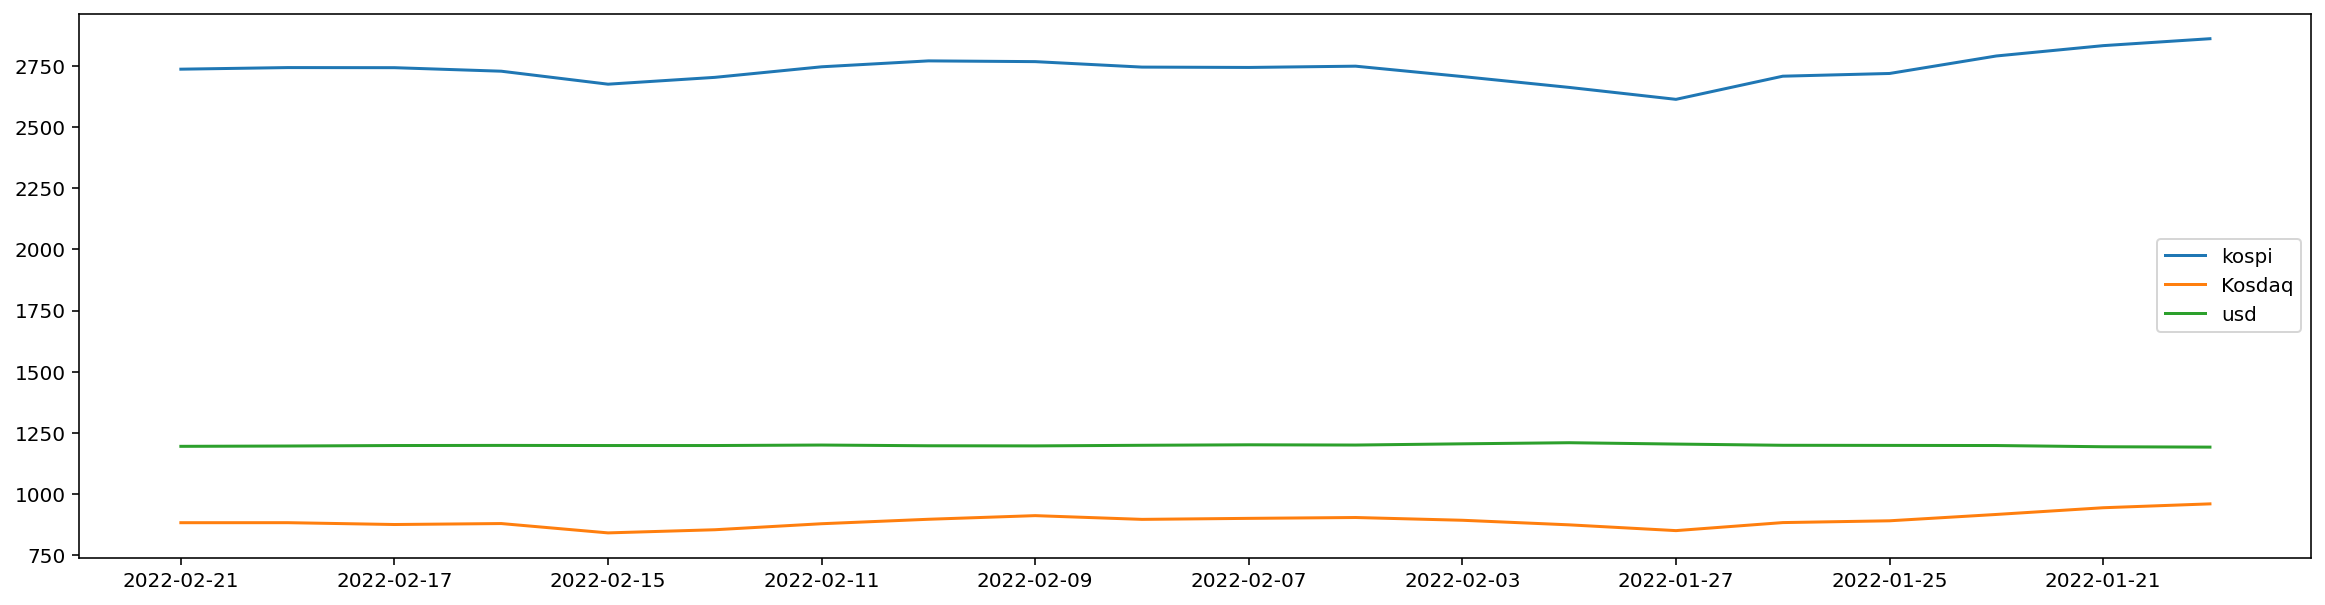

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(df["date"], df["kospi"], label = "kospi")
plt.plot(df["date"], df["Kosdaq"], label = "Kosdaq")
plt.plot(df["date"], df["usd"], label = "usd")
plt.xticks(df["date"][::2])
plt.legend()
plt.show()

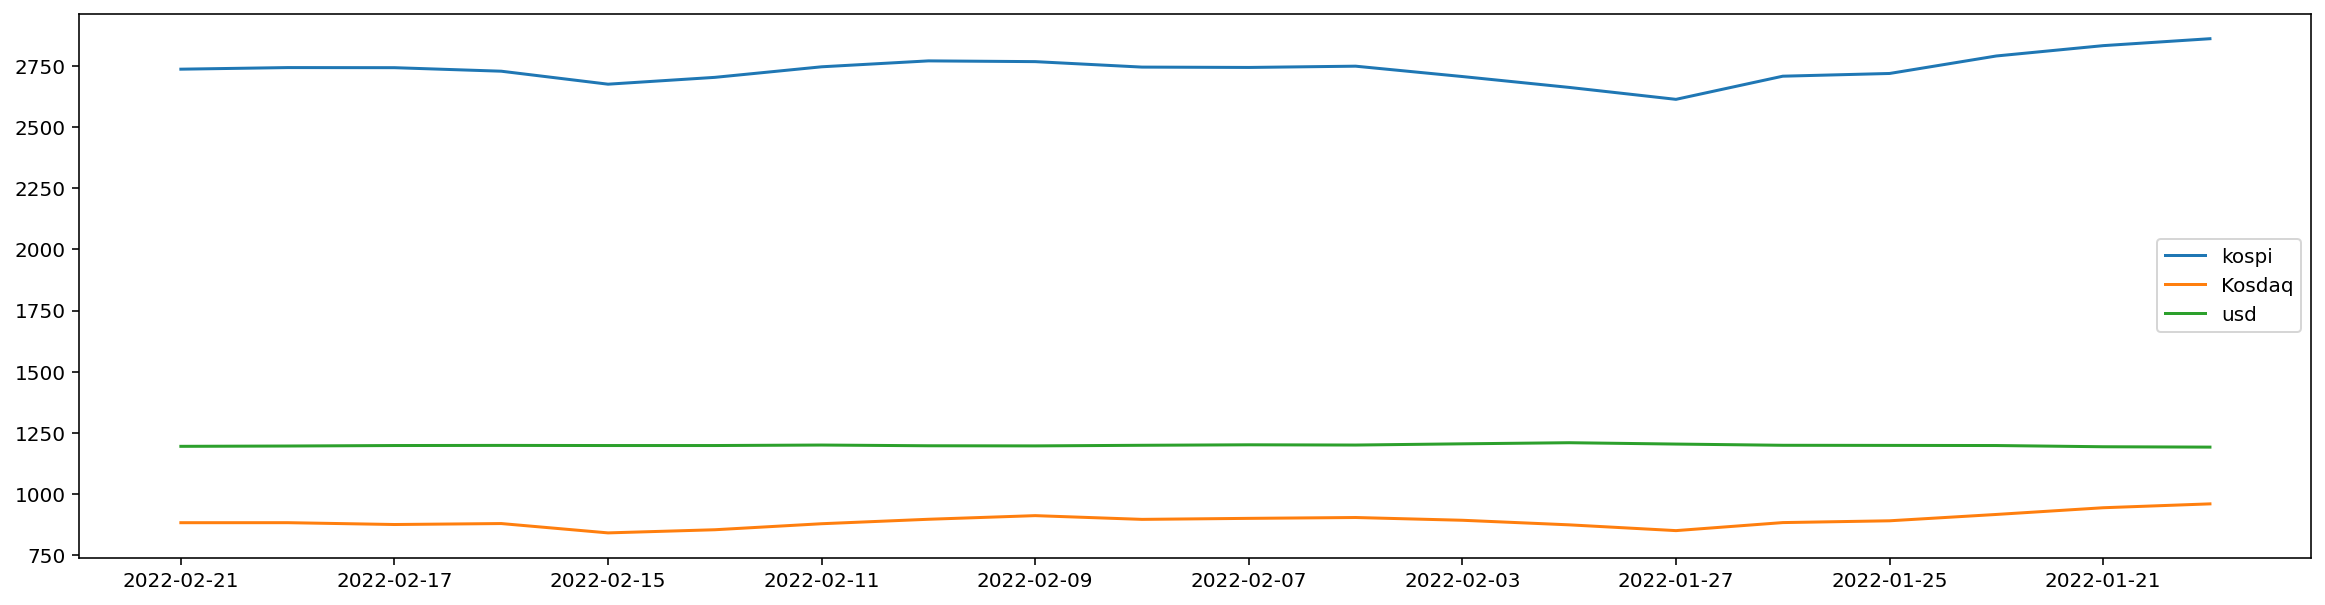

In [56]:
plt.figure(figsize=(20, 5))

# plt.plot(df["date"], df["kospi"], label = "kospi")
# plt.plot(df["date"], df["Kosdaq"], label = "Kosdaq")
# plt.plot(df["date"], df["usd"], label = "usd")

for column in df.columns[1:]:
    plt.plot(df["date"], df[column], label = column)
    
plt.xticks(df["date"][::2])
plt.legend()
plt.show()

### 데이터 스케일링 : min max scale


- z = (x - min(x)) / (max(x) - min(x) ) -> 0 <= z <= 1

In [58]:
from sklearn.preprocessing import minmax_scale

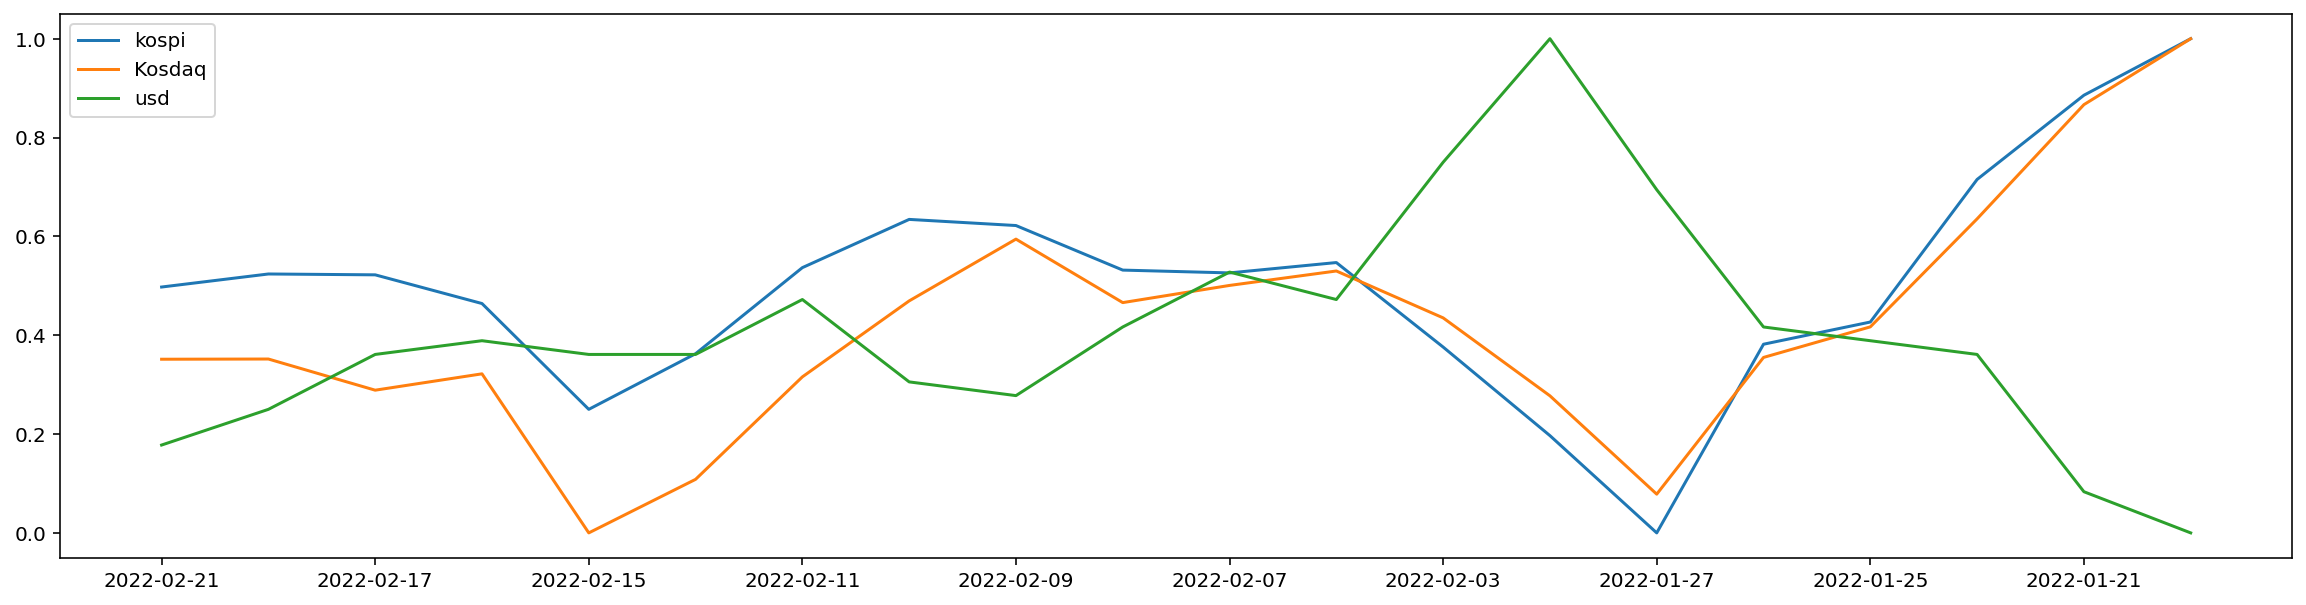

In [59]:
plt.figure(figsize=(20, 5))

for column in df.columns[1:]:
    plt.plot(df["date"], minmax_scale(df[column]), label = column)
    
plt.xticks(df["date"][::2])
plt.legend()
plt.show()

### 상관관계 분석

피어슨 상관계수 : 0과 가까울수록 두 데이터는 관계가 없다. / 1과 가까울수록 두 데이터는 강한 양의 상관관계를 가지고있다.

In [61]:
df[df.columns[1:]].corr()

,kospi,Kosdaq,usd
kospi,1.000000,0.892555,-0.746816
Kosdaq,0.892555,1.000000,-0.504892
usd,-0.746816,-0.504892,1.000000
